# Coupled Logistic map system illustration

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import time
from tqdm.notebook import tqdm_notebook

from ipywidgets import FloatSlider, interact

import matplotlib.cm as cm
import matplotlib as mpl

from matplotlib.colors import ListedColormap, LinearSegmentedColormap

%matplotlib notebook

In [6]:
# Funcitons
def bound(x):
    '''implements the reflective boundary conditions for the [0, 1 interval]
    '''
    z = x
    while not np.all(np.logical_and(z<=1, z>=0)):
        z = np.abs(z)
        inds  = np.where(z > 1)[0]
        for i in inds:
            z[i] = 1 - (z[i] - 1)
    return z

def f(z,  r=3.99):
    '''dynamics of the driver
    '''
    return np.abs(r * z * (1 - z))

def g(y, z, r=3.99, beta=0.2):
    '''dynamics of the forced system
    '''
    return bound(r * y *(1 - y - beta * z))

# for plotting
# Custom colormap
top = cm.get_cmap('Greens_r', 256)
bottom = cm.get_cmap('Reds', 256)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')
cmap = cm.plasma
# cmap = newcmp

imw = 3.37 # imnage width
fs = 8  # fontsize parameter

## Test of the bounding function, which performs the reflection at the boundaries of the [0, 1] interval to keep the dynamics bounded
# testline = np.arange(0, 3, 0.01)

# bline = bound(testline)

# plt.figure()
# plt.plot(testline, lw=3)
# plt.plot(bline, '--', lw=3)
# plt.title('reflective boundary to [0, 1]')

## Generate Return maps

In [7]:
y = np.arange(0, 1, 0.001)  # initial values of the forced system
zs = np.arange(0, 1, 0.05)  # initial values for the driver

y_tp = np.array([g(y, z) for z in zs]).T  # Take 1 step to the future (for combinations of driver values and forced system values)
y_tpp = np.array([g(g(y, z), f(z)) for z in zs]).T  # Take 2 steps to the future (...)

## Plot the return maps in 2D and in 3D of the forced logistic map

<IPython.core.display.Javascript object>


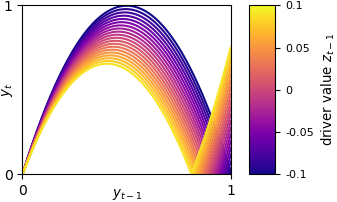

/tmp/ipykernel_247948/1121832807.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels([-0.1, -0.05, 0, 0.05, 0.1], fontsize=fs)


In [12]:
# 2D
fig, [ax0, ax1] = plt.subplots(1, 2, gridspec_kw={'width_ratios': [8, 1]}, figsize=(imw, 0.6*imw))
_ = [ax0.plot(y, y_tp[:, i], 'b', alpha=1, color=cmap(zs[i])) for i in range(y_tp.shape[1])]


ax0.set_xlim(0, 1)
ax0.set_ylim(0, 1)


norm = mpl.colors.Normalize(vmin=0, vmax=0)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('driver value $z_{t-1}$', fontsize=1.2*fs)

ax1.set_yticklabels([-0.1, -0.05, 0, 0.05, 0.1], fontsize=fs)
ax0.set_xlabel("$y_{t-1}$", fontsize=1.2*fs, labelpad=-8)
ax0.set_ylabel("$y_{t}$", fontsize=1.2*fs, labelpad=-8)
ax0.set_yticks([0, 1])
ax0.set_xticks([0, 1])

# fig.suptitle('Return Map of the Forced Logistic Map')

fig.tight_layout(pad=0, w_pad=1, rect=[0, 0, 1, 1])

# fig.savefig('./resfigure/ssr2.eps')

<IPython.core.display.Javascript object>


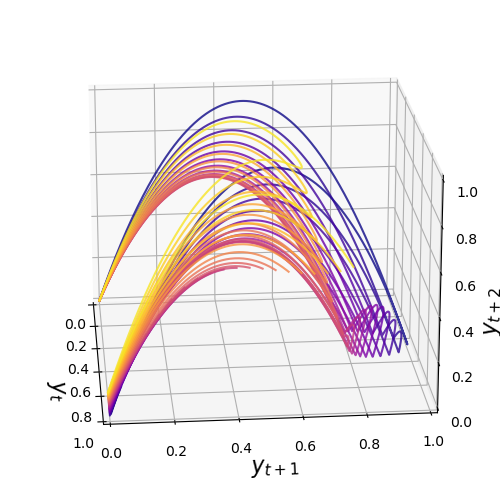

  0%|          | 0/72 [00:00<?, ?it/s]

In [13]:
color_code = []

fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(111, projection='3d')
# _ = [ax1.plot(y, y_tp[:, i], y_tpp[:, i], 'b', alpha=0.8, color=cm.plasma(zs[i])) for i in range(y_tp.shape[1])]
_ = [ax1.plot(y, y_tp[:, i], y_tpp[:, i], 'b', alpha=0.8, color=cmap(zs[i])) for i in range(y_tp.shape[1])]

ax1.set_xlabel("$y_t$", fontsize=16)
ax1.set_ylabel("$y_{t+1}$", fontsize=16)
ax1.set_zlabel("$y_{t+2}$", fontsize=16)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_zlim([0, 1])




ax1.view_init(elev=42., azim=44)

plt.tight_layout(h_pad=0, w_pad=0, pad=0)
ax1.dist=13

plt.savefig('./resfigure/ssr.pdf')
# plt.colorbar(cax=ax1)
ax1.set_title('Forced Logistic Map Embedded into 3D')

azims = np.arange(0, 360, 5)
for azim in tqdm_notebook(azims):
    ax1.view_init(elev=20., azim=azim)
    fig.canvas.draw()
    time.sleep(0.001)

<IPython.core.display.Javascript object>


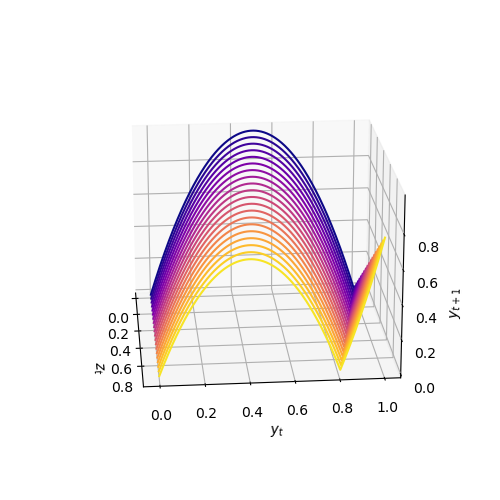

  0%|          | 0/72 [00:00<?, ?it/s]

In [14]:
fig2 = plt.figure(figsize=(5, 5))
ax = plt.subplot(111, projection='3d')
# _=[ax.plot(zs[i]*np.ones(len(y)), y, y_tp[:, i], 'b-', alpha=1, color=cm.plasma(zs[i])) for i in range(0, len(zs), 1)]
_=[ax.plot(zs[i]*np.ones(len(y)), y, y_tp[:, i], 'b-', alpha=1, color=cmap(zs[i])) for i in range(0, len(zs), 1)]
ax.set_xlabel("$z_t$")
ax.set_ylabel("$y_t$")
ax.set_zlabel("$y_{t+1}$")

fig2.savefig('./resfigure/join_embedding.pdf')
azims = np.arange(0, 360, 5)


for azim in tqdm_notebook(azims):
    ax.view_init(elev=20., azim=azim)
    fig2.canvas.draw()
    time.sleep(0.001)